In [1]:
from pymatgen.ext.matproj import MPRester
import warnings
warnings.filterwarnings('ignore') # Remove warnings

# https://pymatgen.org/introduction.html
# You have to use the old Materials Project website: https://legacy.materialsproject.org/dashboard
with MPRester("XNPeIZJFSHBQ0Rgi") as m:

    # Phonon structure for material id
    phstructure = m.get_phonon_bandstructure_by_material_id("mp-984761")

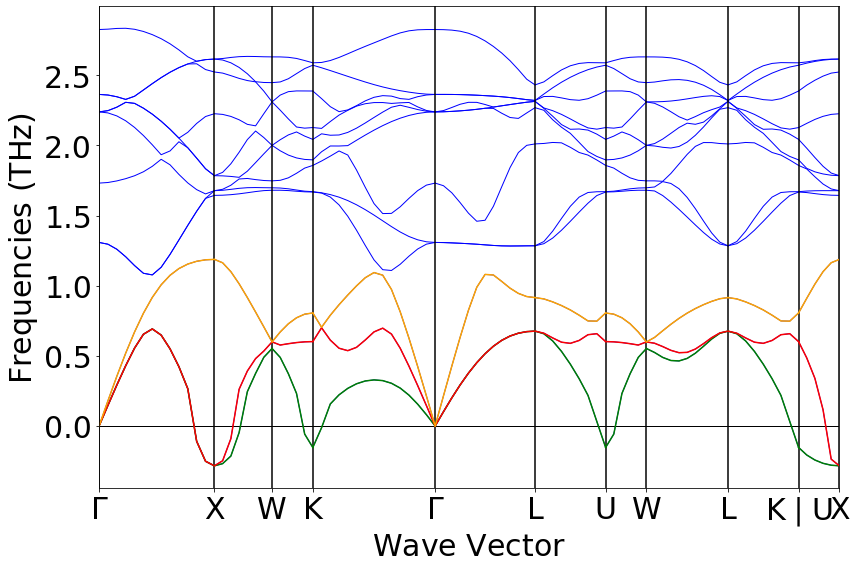

In [2]:
from pymatgen.phonon import plotter
import numpy as np
import matplotlib.pyplot as plt

bandplot = plotter.PhononBSPlotter(phstructure)
data = bandplot.bs_plot_data()

# La première dimension de dist = chemin entre deux lettres grecques.
# La deuxième = quel point entre deux lettres grecques
dist = data.get('distances') 

# Les indices de freq sont donnés par :
# - branch modifie la direction où on est (= entre quelles deux lettres grecques sommes-nous)
# - qpoint choisit la bande que l'on suit sur cette direction (les bandes verticalement)
# - mode détermine la position dans la direction donnée (les points entre deux lettres grecques)
freq = data.get('frequency')

# On plot
bandplot.get_plot()

# Pour chaque i (chaque chemin entre deux lettres) on plot les x et y relatifs aux bandes 0, 1 et 2
for i in range(len(dist)):
    plt.plot(dist[i], freq[i][0], color = 'green')
    plt.plot(dist[i], freq[i][1], color = 'red')
    plt.plot(dist[i], freq[i][2], color = 'orange')

Petit plot de la zone de brillouin (permet de visualiser ce que représentent Γ, X, W, L, L et U).

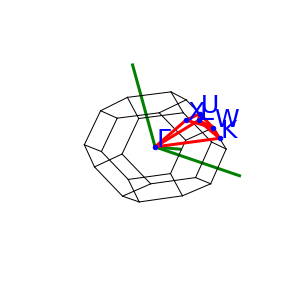

In [3]:
bandplot.plot_brillouin()

<h1>Remarques préliminaires</h1>

La vitesse du son dans le milieu est la vitesse de groupe (vitesse du paquet d'ondes) et est définie par $v_g = \mid\frac{dw}{dq}\mid$ où $w=2\pi f$. On calcule alors la dérivée de manière numérique, en faisant attention aux unités : la fréquence est donnée en THz $=10^{12}$Hz et les distances sont en Angström ($=10^{-10}$ mètres).

In [4]:
# L'indice suivant de f0, f1 ou f2 donne la bande dans laquelle on est.

f0 = freq[0] # Fréquences de la première direction (chemin Gamma - X = indice 0)
f1 = freq[3] # Fréquences de la 2e direction       (chemin K - Gamma = indice 3)
f2 = freq[4] # Fréquences de la 3e direction       (chemin Gamma - L = indice 4)

A = 10**(-10) # Distance en angström
f = 10**12    # Fréquence en THz

In [5]:
def myFunction(chosenBand):
    
    colors = ['green', 'red', 'orange']
    color = colors[chosenBand]
    
    df0 = f0[chosenBand][1] - f0[chosenBand][0]
    df1 = f1[chosenBand][-2] - f1[chosenBand][-1]
    df2 = f2[chosenBand][1] - f2[chosenBand][0]

    dx1 = dist[0][1] - dist[0][0]
    # Pour la zone K-Gamma, comme on est à la fin on prend l'indice -1 et -2 pour avoir les 2 derniers points
    dx2 = dist[3][-2] - dist[3][-1] 
    dx3 = dist[4][1] - dist[4][0]

    # Ici on calcule la dérivée sous forme de différence finie
    v0 = 2*np.pi*(df0*f)/(dx1)*A
    v1 = np.abs(2*np.pi*(df1*f)/(dx2)*A) # Here the slope is negative (we can see it graphicaly), we take the absolute value 
    v2 = 2*np.pi*(df2*f)/(dx3)*A

    print("La vitesse du son le long de la direction Γ - X vaut", v0, "[m/s]")
    print("La vitesse du son le long de la direction Γ - K vaut", v1, "[m/s]")
    print("La vitesse du son le long de la direction Γ - L vaut", v2, "[m/s]")

    # On plot
    bandplot.get_plot()

    for i in range(len(dist)):
        plt.plot(dist[i], freq[i][chosenBand], color)

    # Ici on plot simplement les droites sur base de la vitesse (=slope) en faisant attention aux unités du graphe de base.
    plt.plot([dist[0][0], dist[0][-1]], [0,v0/(A*2*np.pi*f)*(dist[0][-1]-dist[0][0])], '--', color=color,linewidth=5)
    plt.plot([dist[3][-1], dist[3][0]], [0,v1/(A*2*np.pi*f)*(dist[3][-1]-dist[3][0])], '--', color=color,linewidth=5)
    plt.plot([dist[4][0], dist[4][-1]], [0,v2/(A*2*np.pi*f)*(dist[4][-1]-dist[4][0])], '--', color=color,linewidth=5)
    plt.show()

<h1>Vitesse du son pour la première branche acoustique (ici en vert)</h1>

La vitesse du son le long de la direction Γ - X vaut 1682.0459877422816 [m/s]
La vitesse du son le long de la direction Γ - K vaut 933.3397320519082 [m/s]
La vitesse du son le long de la direction Γ - L vaut 1236.0539277736611 [m/s]


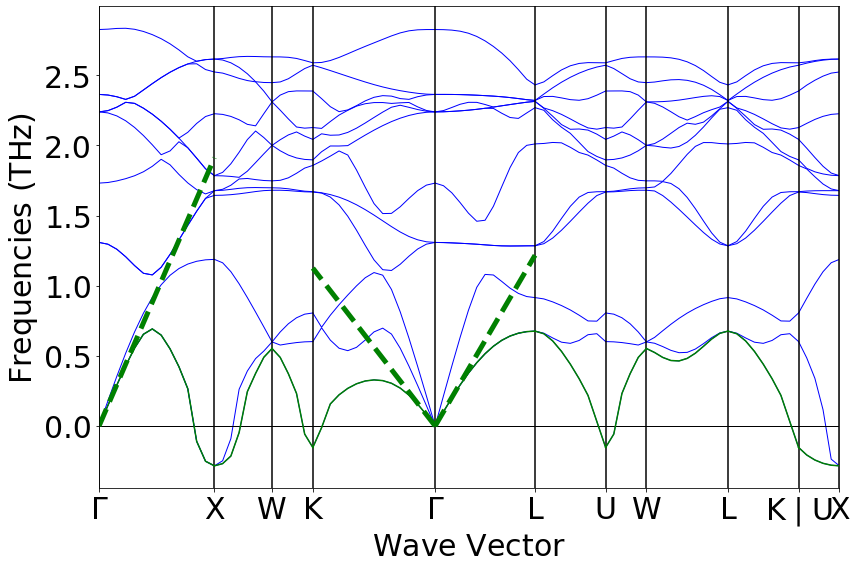

In [6]:
# Première branche accoustique (= indice 0 dans chacune des directions)
myFunction(0)

<h1>Vitesse du son pour la deuxième branche acoustique (ici en rouge)</h1>

La vitesse du son le long de la direction Γ - X vaut 1682.0459877423373 [m/s]
La vitesse du son le long de la direction Γ - K vaut 1683.9382237419672 [m/s]
La vitesse du son le long de la direction Γ - L vaut 1236.0539277738228 [m/s]


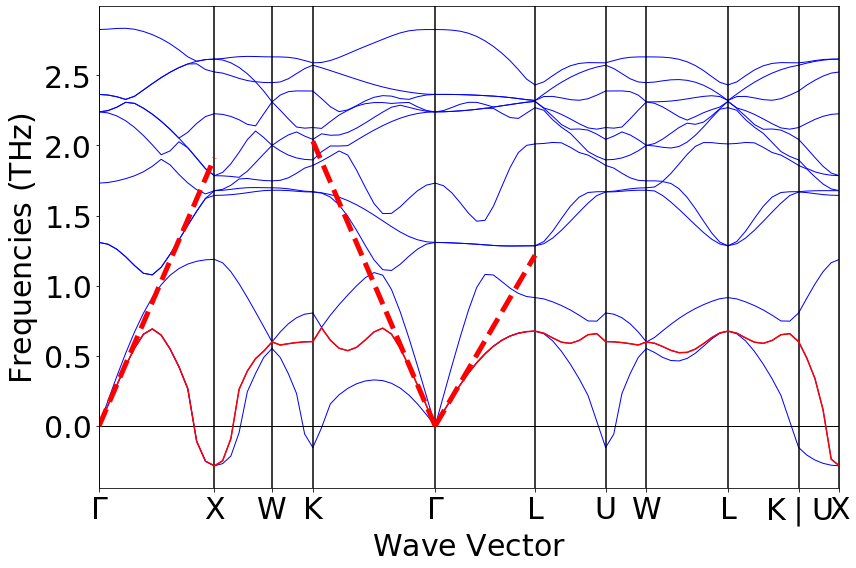

In [7]:
# Deuxième branche accoustique (= indice 1 dans chacune des directions)
myFunction(1)

<h1>Vitesse du son pour la troisième branche acoustique (ici en orange)</h1>

La vitesse du son le long de la direction Γ - X vaut 2050.763312885239 [m/s]
La vitesse du son le long de la direction Γ - K vaut 2483.2618348118544 [m/s]
La vitesse du son le long de la direction Γ - L vaut 2612.662837751371 [m/s]


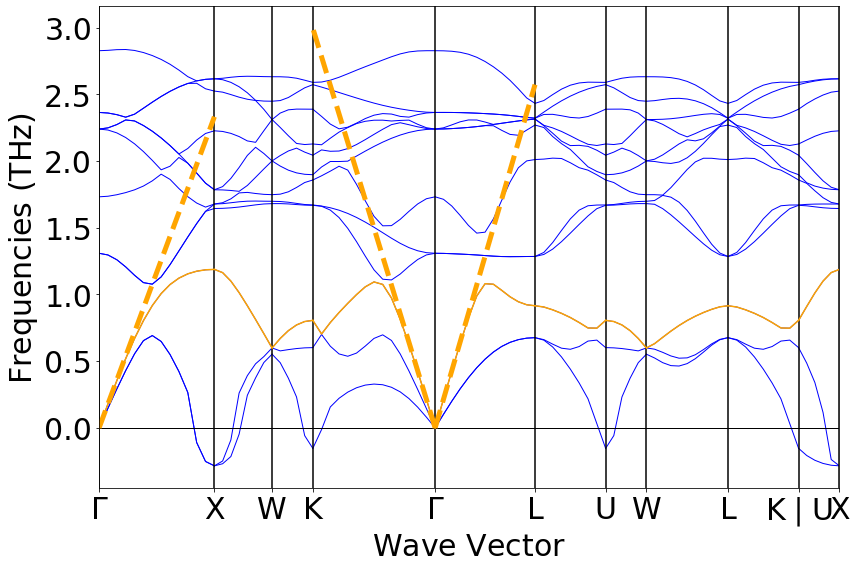

In [8]:
# Troisième branche accoustique (= indice 2 dans chacune des directions)
myFunction(2)